### Dataset : https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge/data

### Dataset Description : 
You are provided with a large number of Wikipedia comments which have been labeled by human raters for toxic behavior. The types of toxicity are:

1.toxic

2.severe_toxic

3.obscene

4.threat

5.insult

6.identity_hate




In [ ]:
import numpy as np
import pandas as pd
import nltk
import keras 
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
start = time.time()

def print_time(start):
  time_now = time.time() - start
  minutes = int(time_now / 60)
  seconds = int(time_now % 60)
  if seconds < 10 :
    print("Elapsed time was %d:0%d." % (minutes , seconds))
  else:
    print("Elapsed time was %d:%d." % (minutes , seconds))

In [ ]:
df = pd.read_csv('/content/train.csv')
df_sub = pd.read_csv('/content/test.csv')

submission = pd.DataFrame()
submission['id'] = df_sub.id.copy()

In [ ]:
def null_percentage(column):
  df_name = column.name
  nans = np.count_nonzero(column.isnull().values)
  total = column.size
  frac = nans / total
  perc = int(frac*100)
  print("%d%% or %d missing from %s column." % (perc , nans , df_name))


def check_null(df , columns):
  for col in columns:
    null_percentage(df[col])

check_null(df , df.columns)

0% or 0 missing from id column.
0% or 0 missing from comment_text column.
0% or 0 missing from toxic column.
0% or 0 missing from severe_toxic column.
0% or 0 missing from obscene column.
0% or 0 missing from threat column.
0% or 0 missing from insult column.
0% or 0 missing from identity_hate column.


In [ ]:
print("%d features and %d records." %(df.shape[1] , df.shape[0]))
print()
target = list(df.columns[2:])
print("Target Columns : " + " , ".join(target))

8 features and 159571 records.

Target Columns : toxic , severe_toxic , obscene , threat , insult , identity_hate


In [ ]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


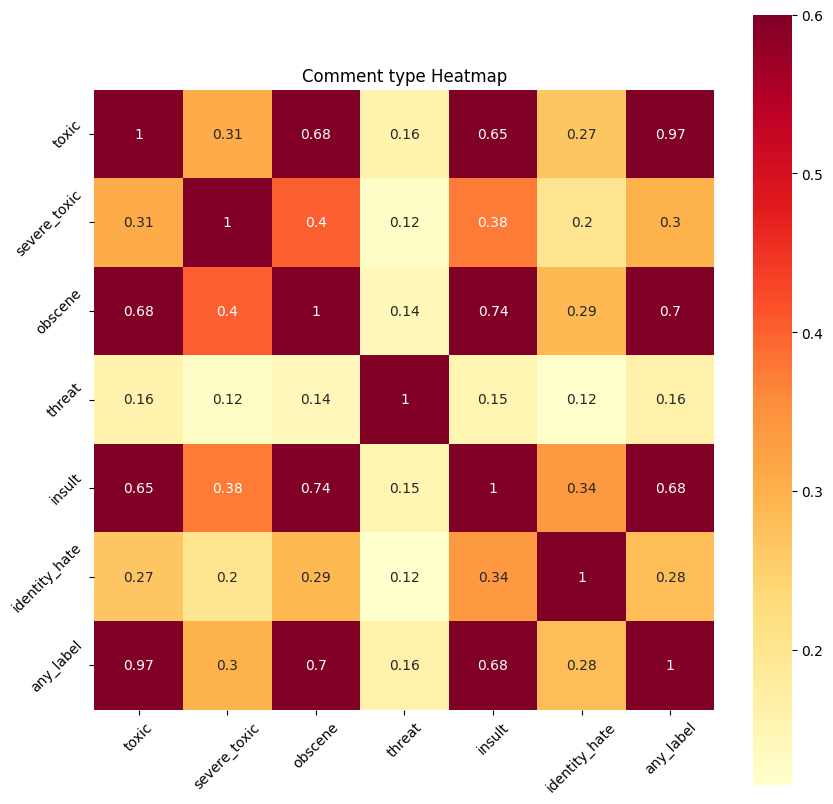

Training Data Comment Breakdown

16225 out of 159571 comments , or 10.17% , are classified as toxic

15294 toxic comments . (9.58% of all data)
-1595 or 10.43% were also severe_toxic.
-7926 or 51.82% were also obscene.
-449 or 2.94% were also threat.
-7344 or 48.02% were also insult.
-1302 or 8.51% were also identity_hate.
-15294 or 100.00% were also any_label.

1595 severe_toxic comments . (1.00% of all data)
-1595 or 100.00% were also toxic.
-1517 or 95.11% were also obscene.
-112 or 7.02% were also threat.
-1371 or 85.96% were also insult.
-313 or 19.62% were also identity_hate.
-1595 or 100.00% were also any_label.

8449 obscene comments . (5.29% of all data)
-7926 or 93.81% were also toxic.
-1517 or 17.95% were also severe_toxic.
-301 or 3.56% were also threat.
-6155 or 72.85% were also insult.
-1032 or 12.21% were also identity_hate.
-8449 or 100.00% were also any_label.

478 threat comments . (0.30% of all data)
-449 or 93.93% were also toxic.
-112 or 23.43% were also severe_tox

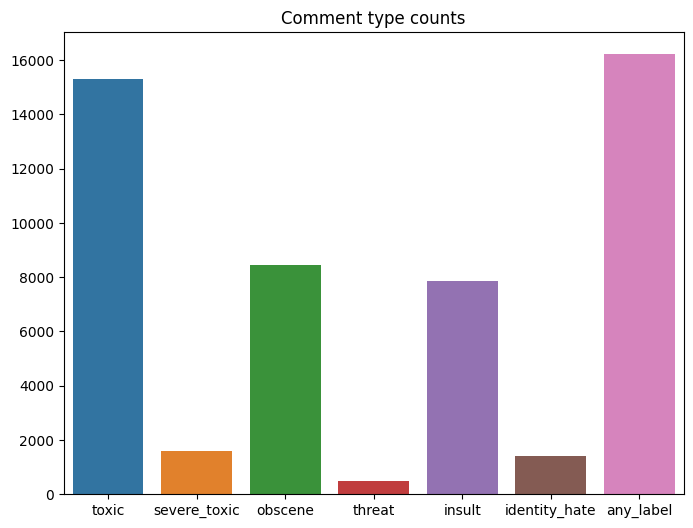

In [ ]:
targets = list(df.columns[2:])
df_targets = df[targets].copy()


## How many rows are toxic ? 
toxic_rows = df_targets.sum(axis=1)
toxic_rows = (toxic_rows > 0)

## Create overall any label feature
targets.append('any_label')
df_targets['any_label'] = toxic_rows


count_dic = {}
for comment_type in targets:
  counts = list()
  others = list(targets)
  df_selection = df_targets[(df_targets[comment_type]==1)]
  others.remove(comment_type)
  counts.append(('total' , len(df_selection)))
  for other in others:
    counts.append((other , df_selection[other].sum()))
  count_dic[comment_type] = counts


del(df_selection)

def heatmap(df , title):
  plt.figure('heatmap' , figsize=[10,10])
  plt.title(title)
  df_corr = df.corr()
  sns.heatmap(df_corr , vmax=0.6 , square=True , annot=True , cmap='YlOrRd')
  plt.yticks(rotation = 45)
  plt.xticks(rotation = 45)
  plt.show()

heatmap(df_targets , 'Comment type Heatmap')

print("Training Data Comment Breakdown")
print("======\n")

print("%d out of %d comments , or %.2f%% , are classified as toxic" %(np.sum(toxic_rows) , len(df) , (np.sum(toxic_rows)/len(df))*100))

totals = []
for key , value in count_dic.items():
  totals.append(value[0][1])
  print("\n%d %s comments . (%.2f%% of all data)" % (value[0][1] , key , (value[0][1]/len(df))*100))
  for cnt in value[1:]:
    print("-%d or %.2f%% were also %s." %(cnt[1] , (cnt[1] / value[0][1])*100 , cnt[0]))


plt.figure("Comment type counts" , figsize=[8,6])
plt.title("Comment type counts")
sns.barplot(x=list(count_dic.keys()) , y=totals)
plt.show()



In [ ]:
for t in targets:
  print("Labels : %s =========================================================" %t)
  b = np.where(df_targets[t]==1)[0]
  selection = np.random.choice(b , 10)
  for s in selection:
    print(df.comment_text.loc[s])
    print("+++++++++++")
  print()

b = np.where(df_targets.any_label==0)[0]
selection = np.random.choice(b , 10)
print("Clean Comments =======================================================")
for s in selection:
    print(df.comment_text.loc[s])
    print("+++++++++++")

Labels : toxic =========================================================
"

City departments

As of 70 minutes ago, Sturgeon bay fire dept responded to the holiday motel right at the east end of the downtown bridge.

Get this, they have 2 pumpers, 1 mini pumper, 1 tanker, 1 ladder truck, and 1 rescue truck from the city.... AS WELL AS 1 pumper, 1 mini pumper, and 1 rescue from the southern door fire dept...... And they have only started (as of this writing) to try and put it out!!!!! Even then, there are only 3 people actively fighting the fire - the rest are just standing around WATCHING!!!

WHAT.... THE..... F***!?!?!?!?!?! When did the fire dept turn wimps??? And WHY are the citizens paying for all these firefighters when they're not doing anything???

Will fast-track the photos, and get them up on the ""sturgeon bay"" yahoo group by tuesday, should anyone care to see them.

 "
+++++++++++
Oh my god, are you serious? If you don't know a simple word that a 2nd grader knows, might I s

In [ ]:
df['length'] = df.comment_text.apply(lambda x:len(x))
print("Average toxic comment length : %d" % int(np.mean(df[(df_targets.any_label==1)].length)))
print("Average clean comment length : %d" % int(np.mean(df[(df_targets.any_label==0)].length)))



Average toxic comment length : 303
Average clean comment length : 404


In [ ]:
print("Median toxic comment length : %d" % int(np.median(df[(df_targets.any_label==1)].length)))
print("Median clean comment length : %d" % int(np.median(df[(df_targets.any_label==0)].length)))

Median toxic comment length : 128
Median clean comment length : 216


In [ ]:
def pct_caps(s):
  return sum([1 for c in s if c.isupper()]) / (sum(([1 for c in s if c.isalpha()])) + 1)

df['caps'] = df.comment_text.apply(lambda x: pct_caps(x))
print("Percentage of capitalized character in toxic comment : %d%%" % int(100 * np.mean(df[(df_targets.any_label==1)].caps)))
print("Percentage of capitalized character in clean comment : %d%%" % int(100 * np.mean(df[(df_targets.any_label==0)].caps)))

Percentage of capitalized character in toxic comment : 14%
Percentage of capitalized character in clean comment : 5%


In [ ]:
def word_length(s):
  s = s.split(' ')
  return np.mean([len(w) for w in s if w.isalpha()])

df['word_length'] = df.comment_text.apply(lambda x: word_length(x))

print("Average word length in toxic comment : %.1f" % np.mean(df[(df_targets.any_label==1)].word_length))
print("Average word length in clean comment : %.1f" % np.mean(df[(df_targets.any_label==0)].word_length))


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


Average word length in toxic comment : 4.1
Average word length in clean comment : 4.4


In [ ]:
df['exclamation'] = df.comment_text.apply(lambda s: len([c for c in s if c == '!']))

print("Exclamation in toxic comment : %.1f" % np.mean(df[(df_targets.any_label==1)].exclamation))
print("Exclamation in clean comment : %.1f" % np.mean(df[(df_targets.any_label==0)].exclamation))

Exclamation in toxic comment : 3.5
Exclamation in clean comment : 0.3


In [ ]:
df['question'] = df.comment_text.apply(lambda s: len([c for c in s if c == '?']))

print("Question Mark in toxic comment : %.1f" % np.mean(df[(df_targets.any_label==1)].question))
print("Question Mark in clean comment : %.1f" % np.mean(df[(df_targets.any_label==0)].question))

Question Mark in toxic comment : 0.6
Question Mark in clean comment : 0.4


In [ ]:
import re

ip = re.compile('(([2][5][0-5]\.)|([2][0-4][0-9]\.)|([0-1]?[0-9]?[0-9]\.)){3}' + 
                '(([2][5][0-5])|([2][0-4][0-9])|([0-1]?[0-9]?[0-9]))')

def strip_ip(s , ip):
  try:
    found = ip.search(s)
    return s.replace(found.group() , ' ')
  except:
    return s

df.comment_text = df.comment_text.apply(lambda x: strip_ip(x , ip))

Label Overlap Summary
1 labels : 39.2%
2 labelss : 21.4%
3 labelss : 25.9%
4 labelss : 10.8%
5 labelss : 2.4%
6 labelss : 0.2%


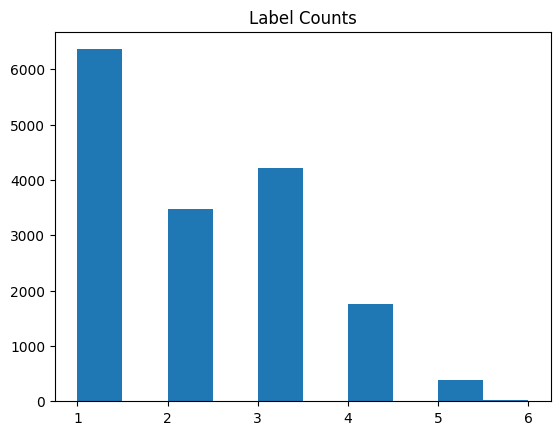

In [ ]:
target_sums = np.sum(df_targets[df_targets.columns[:-1]] , axis=1)
target_sums = target_sums[(df_targets.any_label==1)]
plt.figure('Label Counts')
plt.title('Label Counts')
plt.hist(target_sums)
print("Label Overlap Summary")

for i in range(1,7):
  print('%d labels%s : %.1f%%' % (i , 's' if i>1 else '' , 100 * len([s for s in target_sums if s==i]) / len(target_sums)))

In [ ]:
print("Training Labels : ")
print(list(df_targets.columns))
print(df_targets.shape)

print("Training data")
df.drop(list(df_targets.columns[:-1]) , inplace=True , axis=1)
df.drop('id' , inplace=True , axis=1)
print(list(df.columns))
print(df.shape)



Training Labels : 
['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'any_label']
(159571, 7)
Training data
['comment_text', 'length', 'caps', 'word_length', 'exclamation', 'question']
(159571, 6)


In [ ]:
from keras.preprocessing.text import Tokenizer , text_to_word_sequence
from nltk.corpus import stopwords
import string

top_words = 5000
tokenizer = Tokenizer(filters=string.punctuation +'\n' , lower=True , num_words=top_words)
tokenizer.fit_on_texts(df['comment_text'])

In [ ]:
df['comment_sequence'] = tokenizer.texts_to_sequences(df.comment_text.str.lower())

In [ ]:
str(df.comment_sequence[890])

'[1, 19, 641, 23, 1, 22, 856, 43, 19, 48, 2035, 2, 10, 13, 121, 126, 8, 201, 10, 412, 975, 1127, 17, 10, 10, 13, 8, 1, 1630, 856, 55, 95, 602, 39, 6, 125, 62, 2035, 981, 2379, 14, 969, 4, 3610, 17, 316, 17, 3, 72, 1, 531, 45, 1039, 2221, 641, 23, 62, 1907, 5, 4220, 319, 43, 8, 14, 97, 1, 1353, 4, 32, 842, 36, 42, 1813, 1493, 27, 13, 190, 18, 15, 1, 856, 24, 6, 95, 521, 43, 19, 2379, 39, 1, 2408, 4, 33, 1011, 2523, 2, 11, 2177, 319, 319]'

In [ ]:
max_len = df.comment_sequence.map(lambda x : len(x)).max()
print("Max Comment Length is %d."%max_len)

Max Comment Length is 1399.


In [ ]:
seq_lens = df.comment_sequence.map(lambda x : len(x))

In [ ]:
for i in [10 , 50 , 100 , 200 , 300 , 400 , 500 , 1000 , 1200]:
  select = (seq_lens > i)
  print("%.2f%% of comments have more than %d words." %((np.sum(select) / len(seq_lens)) * 100 , i))

83.34% of comments have more than 10 words.
35.22% of comments have more than 50 words.
16.06% of comments have more than 100 words.
5.61% of comments have more than 200 words.
2.62% of comments have more than 300 words.
1.63% of comments have more than 400 words.
1.08% of comments have more than 500 words.
0.02% of comments have more than 1000 words.
0.01% of comments have more than 1200 words.


In [ ]:
def get_word_cnt(tokenizer):
  word_cnt = [(k,v) for k,v in zip(tokenizer.word_counts.keys() , tokenizer.word_counts.values())]
  word_cnt.sort(key=lambda tup: tup[1] , reverse=True)
  stopWords = set(stopwords.words('english'))
  word_cnt = [tup for tup in word_cnt if tup[0] not in stopWords]
  return word_cnt


def word_plot(word_cnt , num_words , title):
  plt.figure(title , figsize=(24,12))
  plt.suptitle(title , fontsize=40)
  sns.barplot(x=[tup[0] for tup in word_cnt[0:num_words]] , y=[tup[1] for tup in word_cnt[0:num_words]])
  plt.yticks(fontsize=20)
  plt.xticks(fontsize=20 , rotation=35 , ha="right")
  plt.show()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

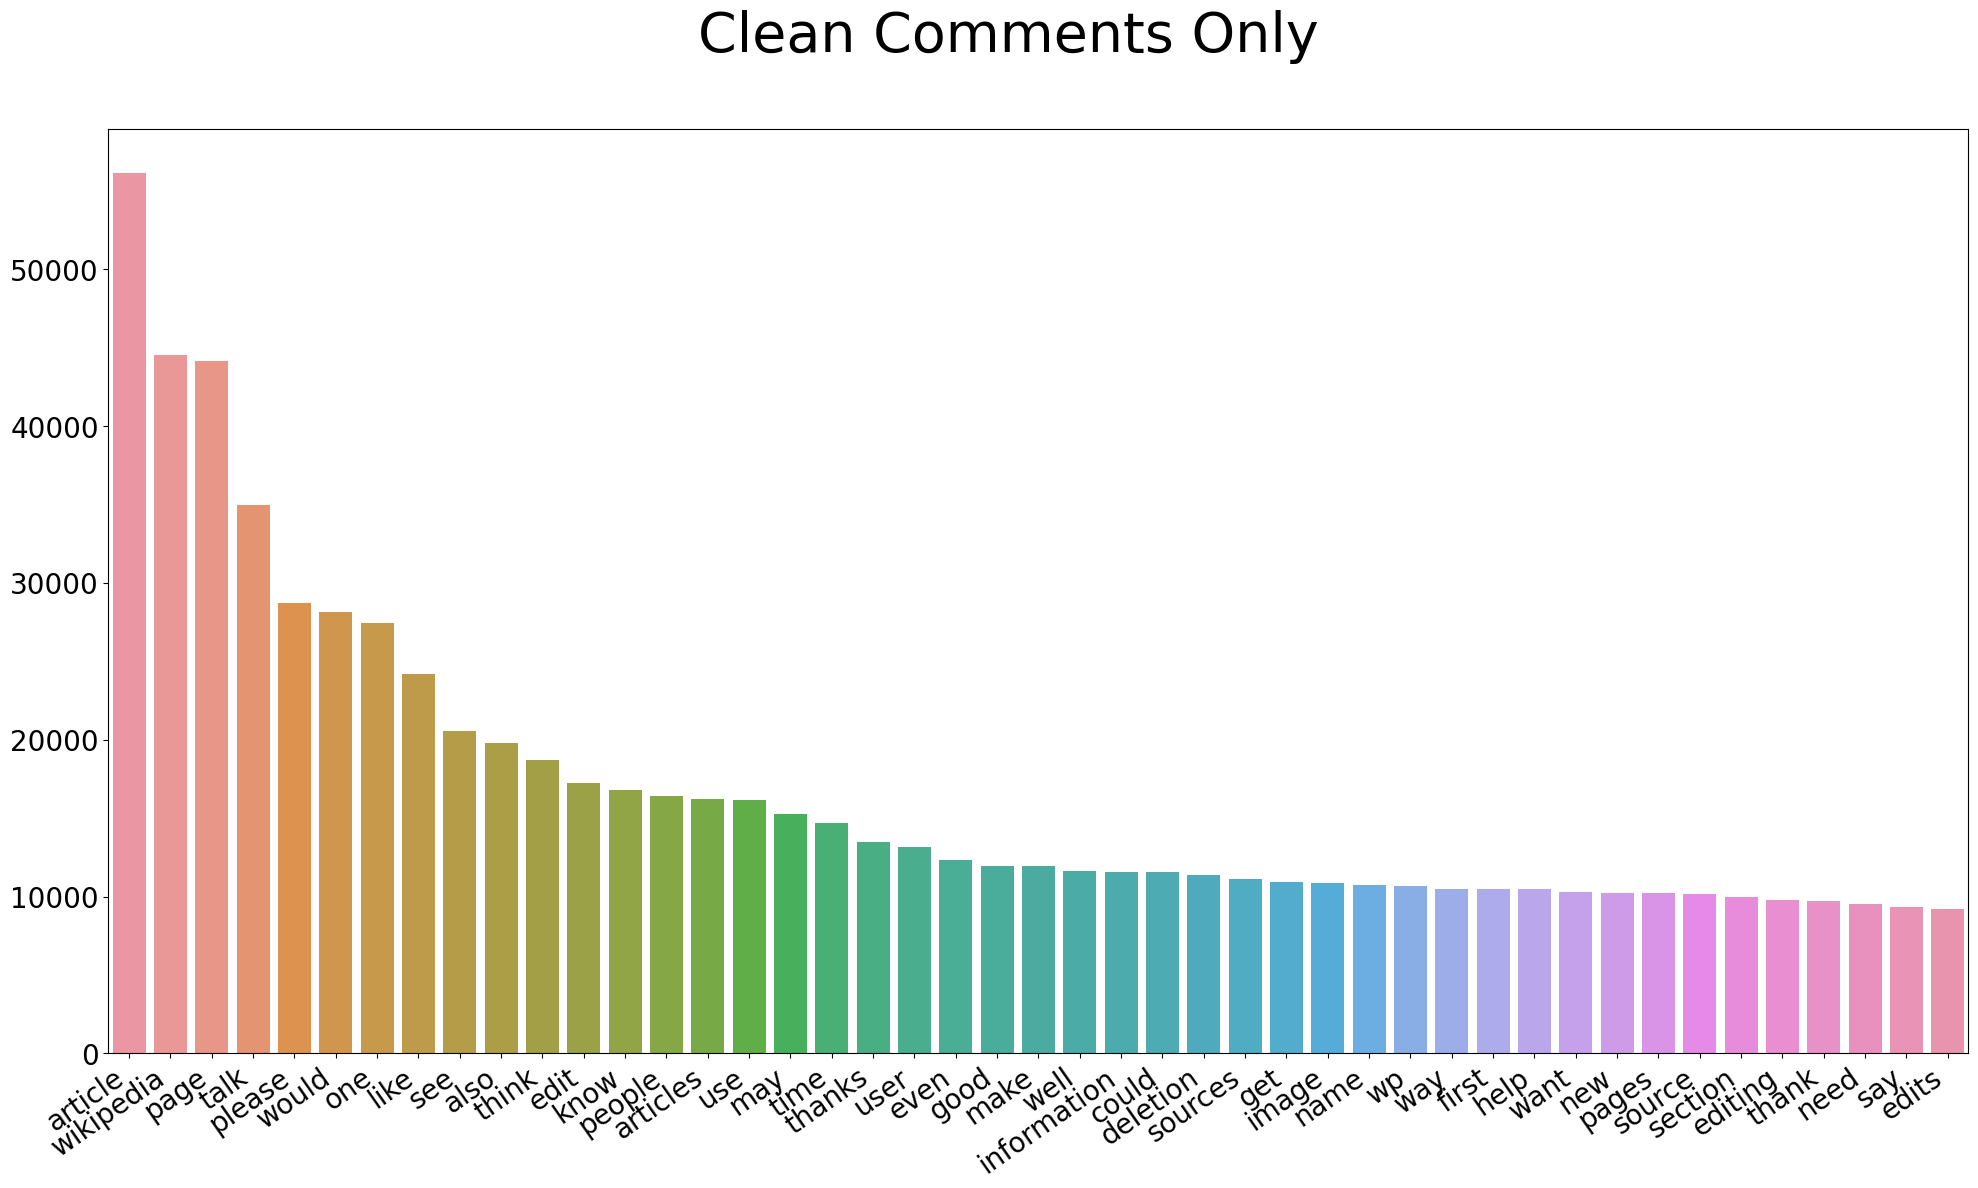

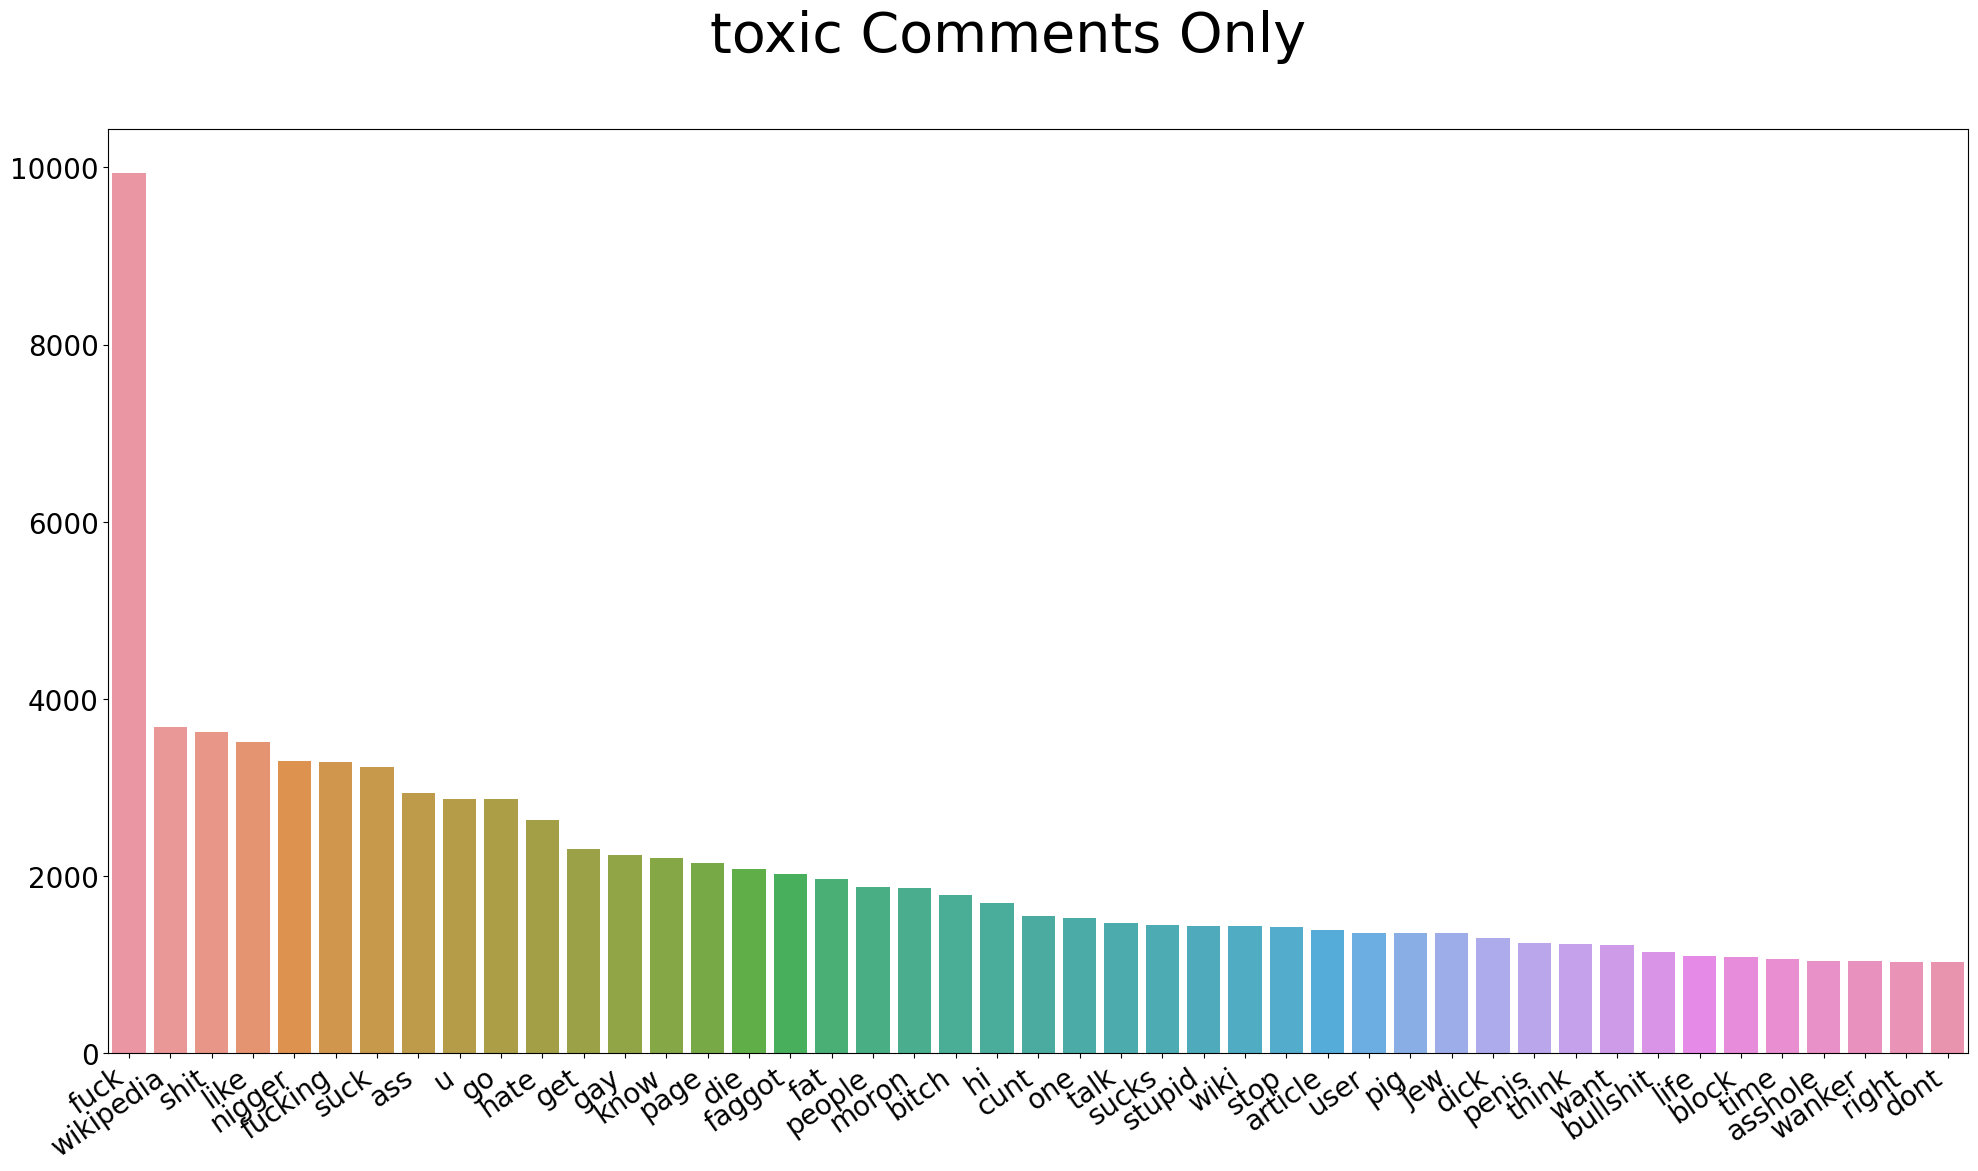

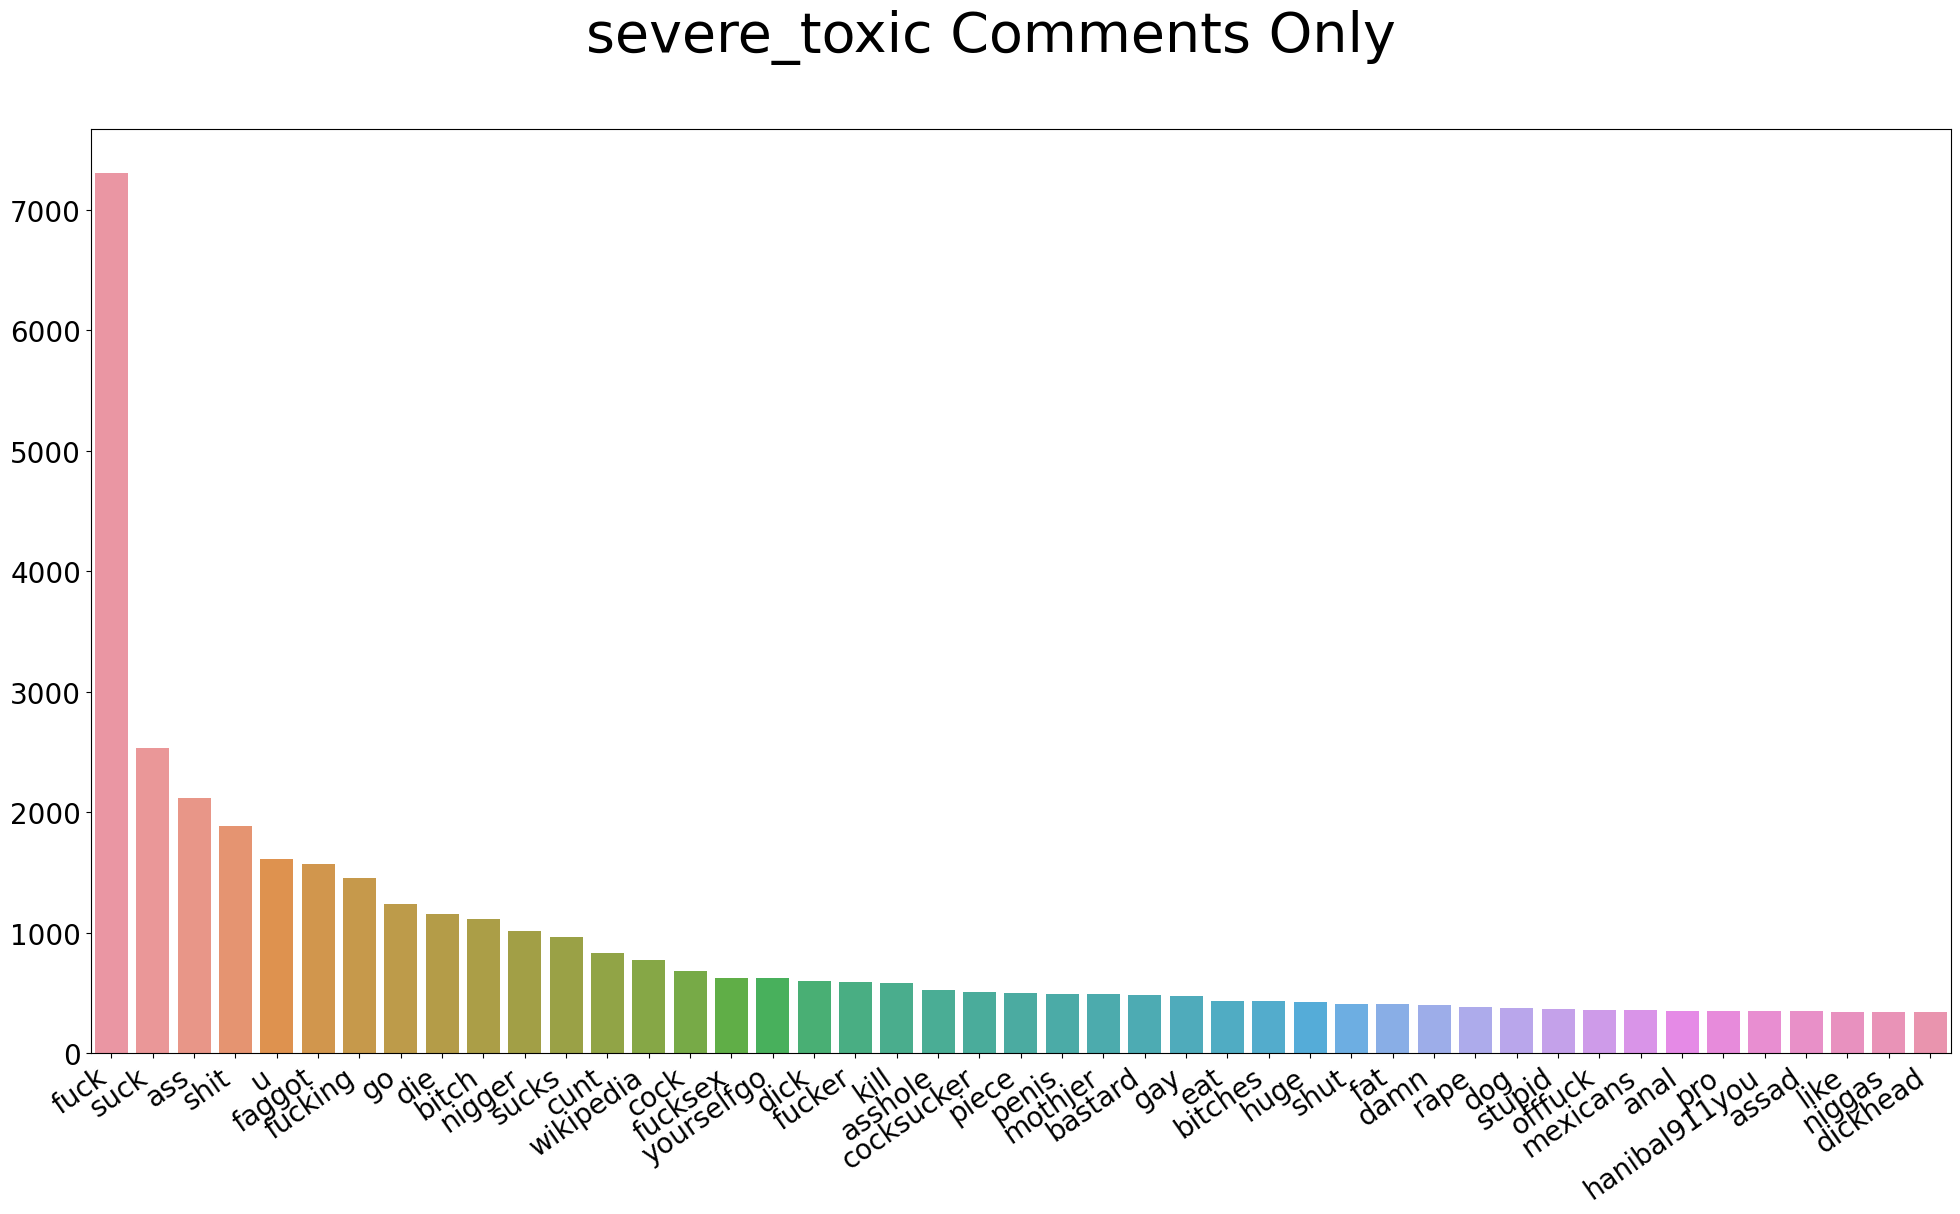

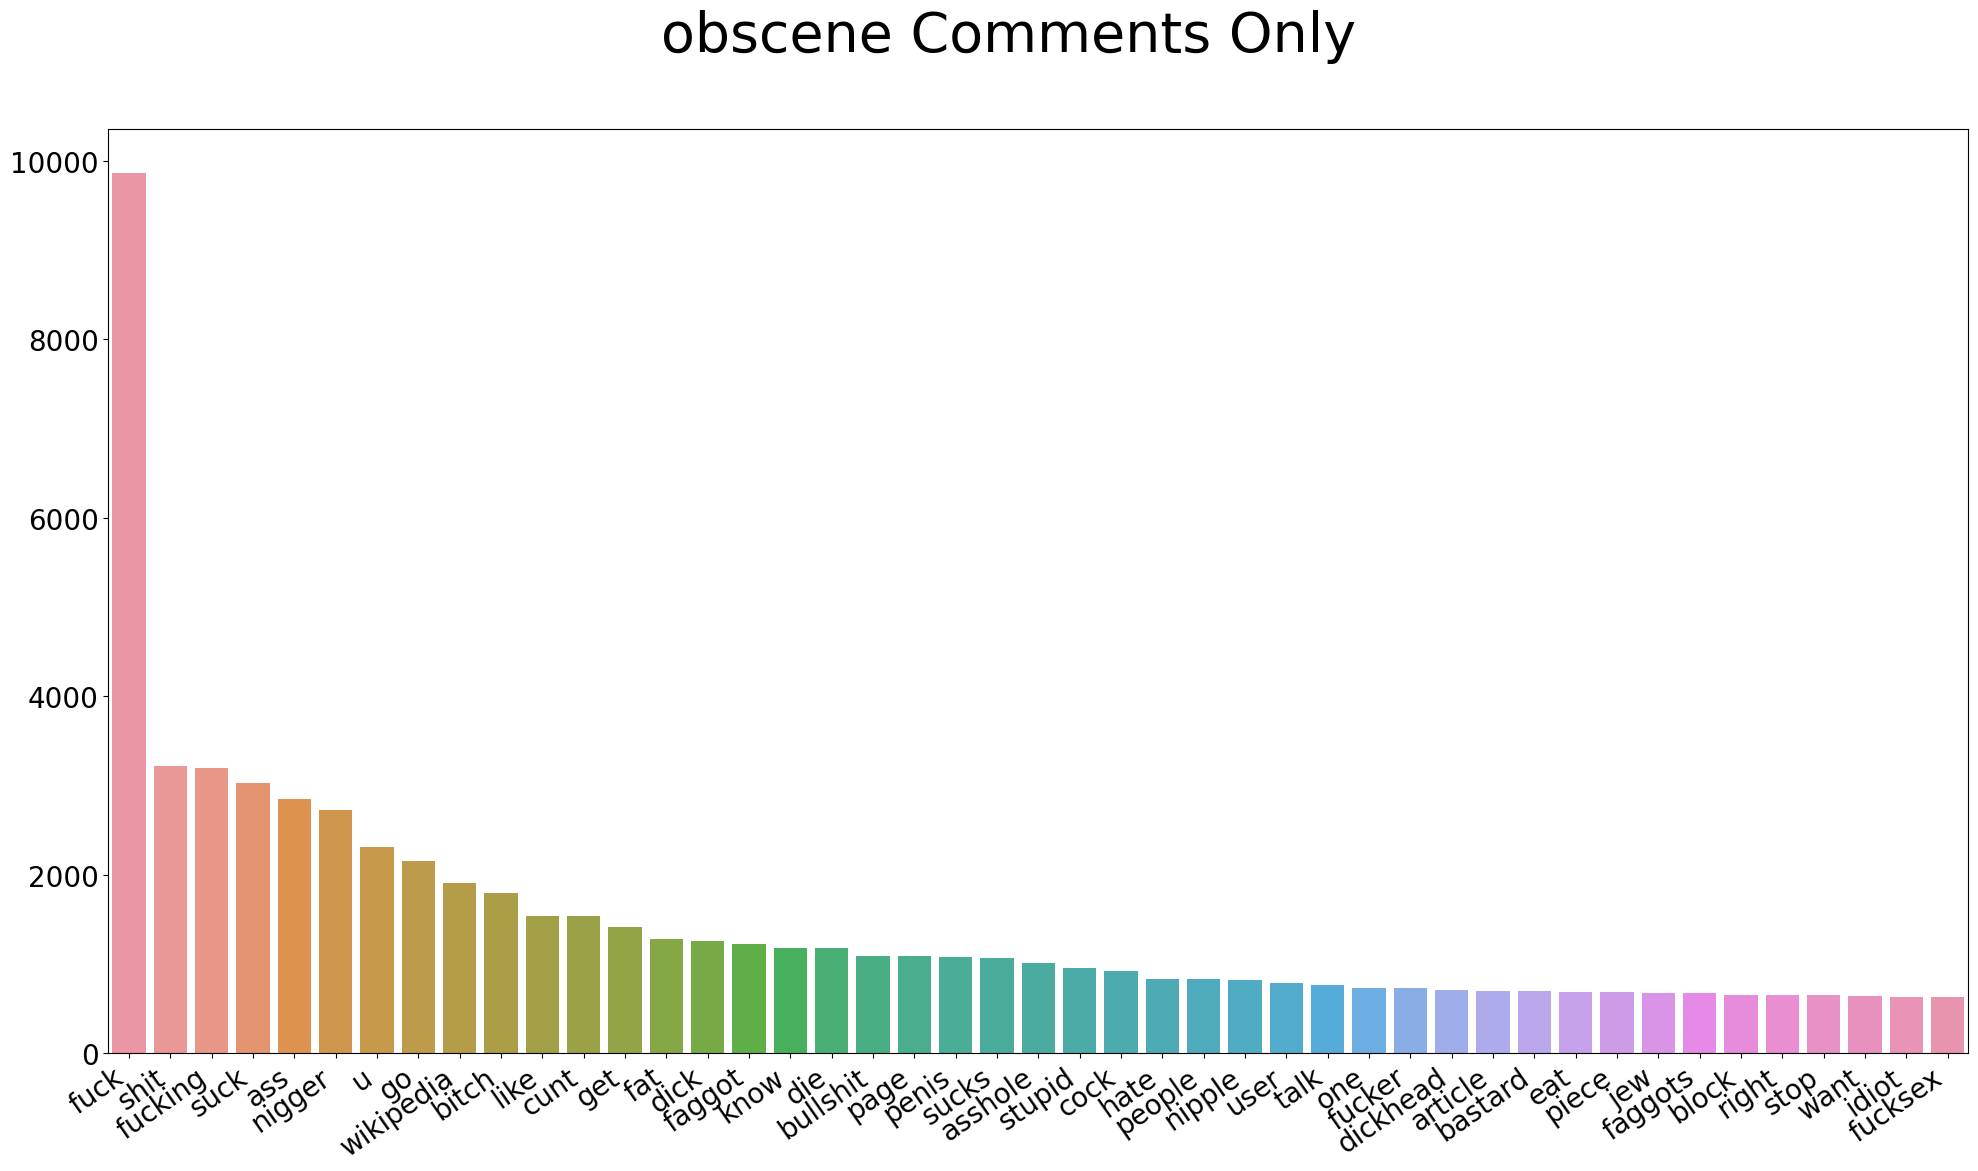

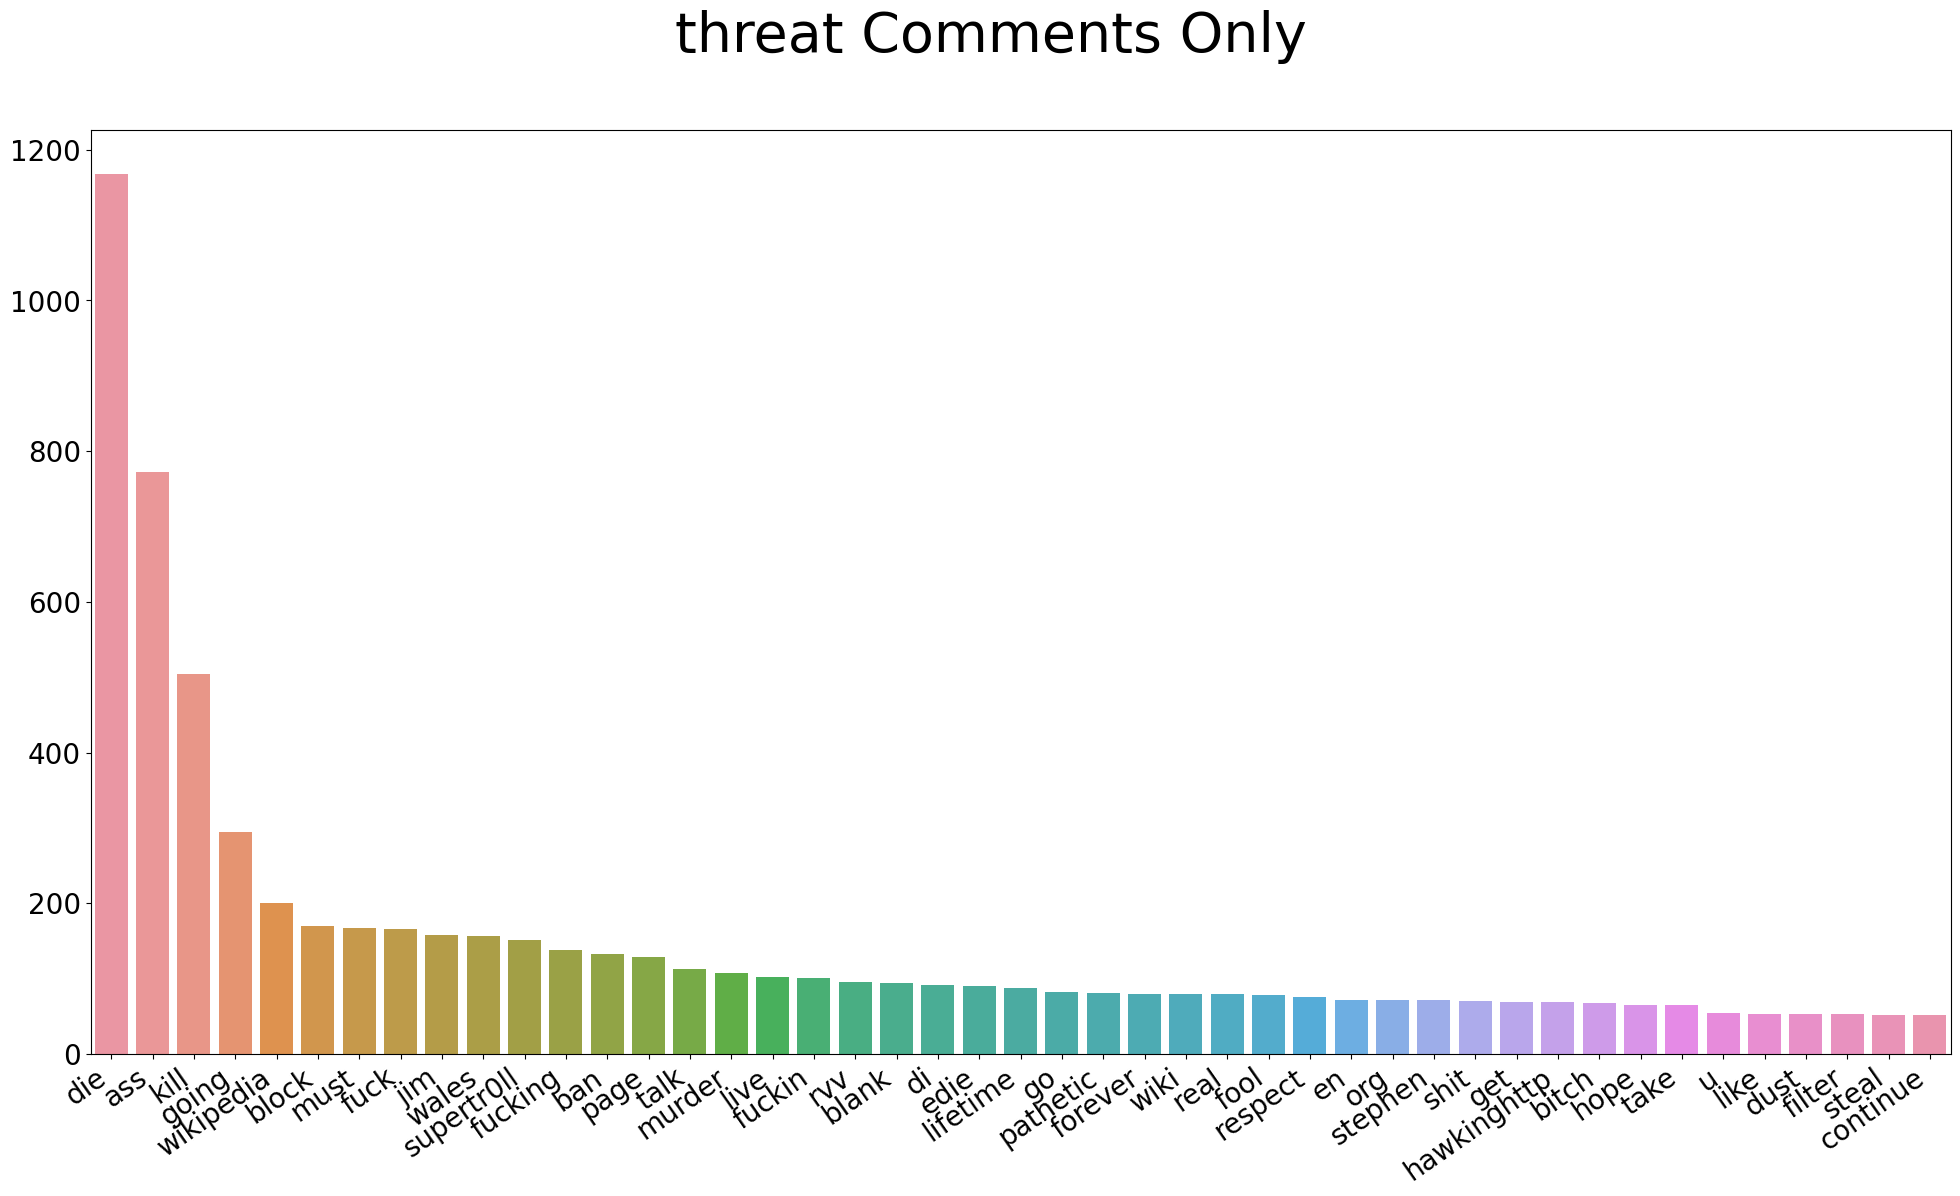

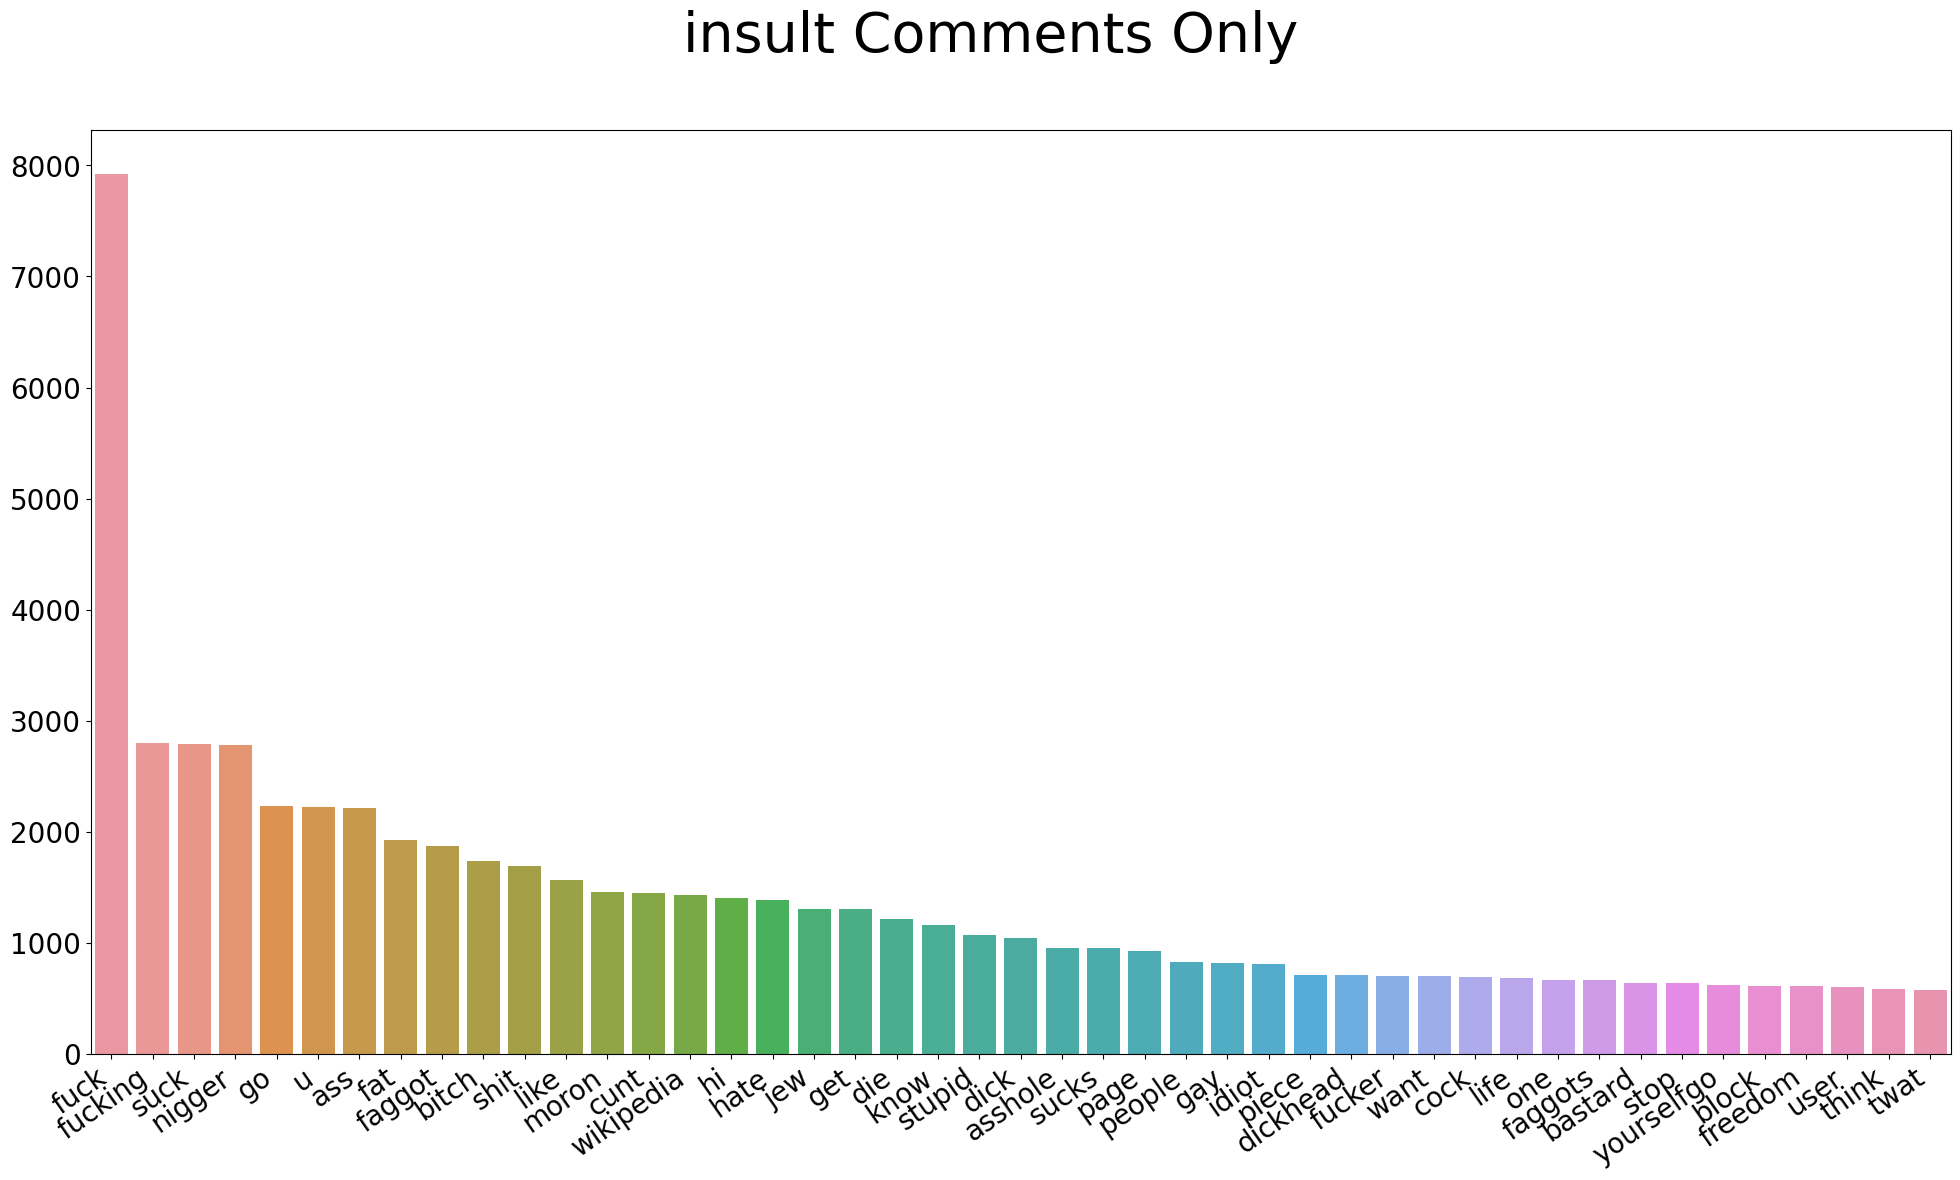

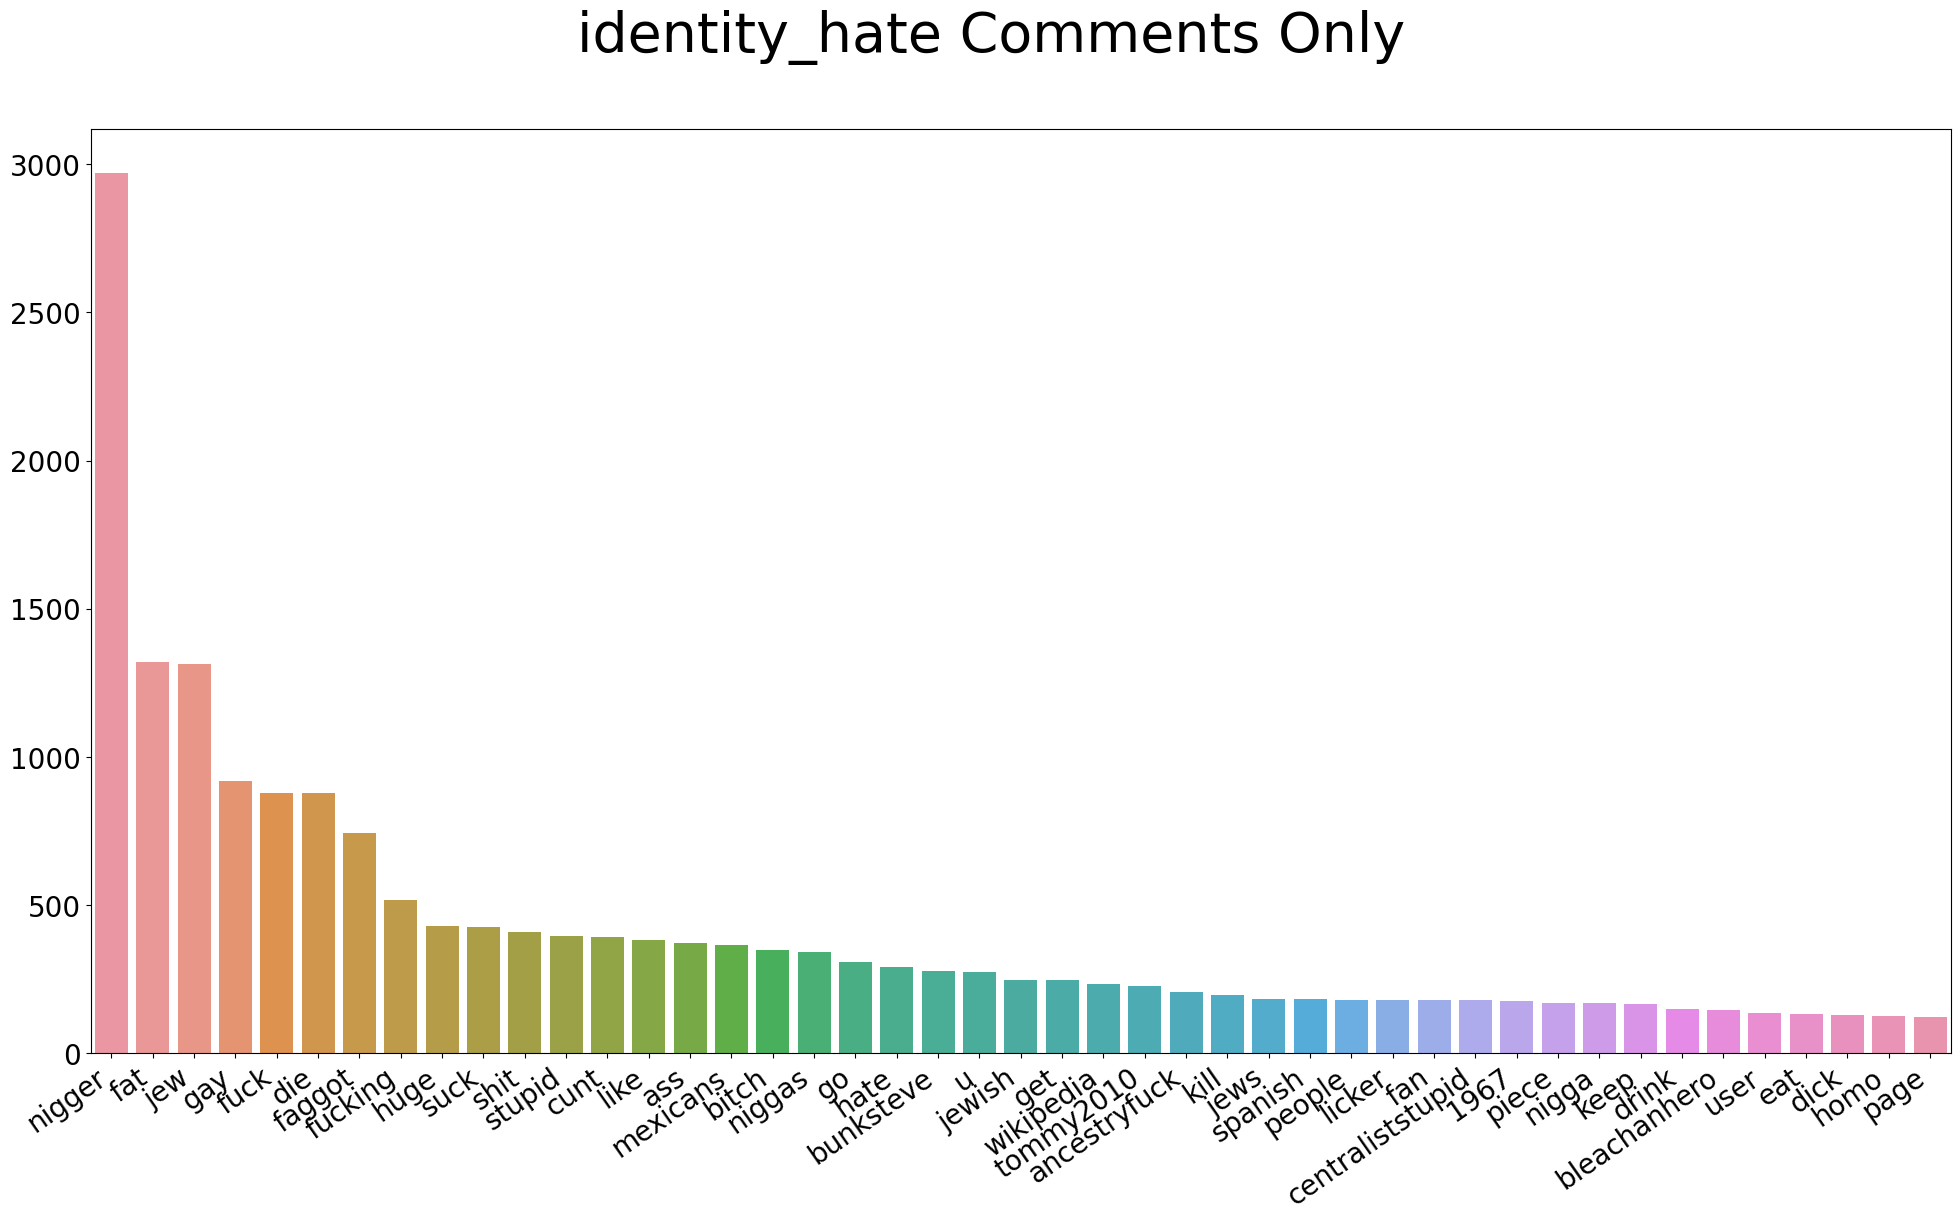

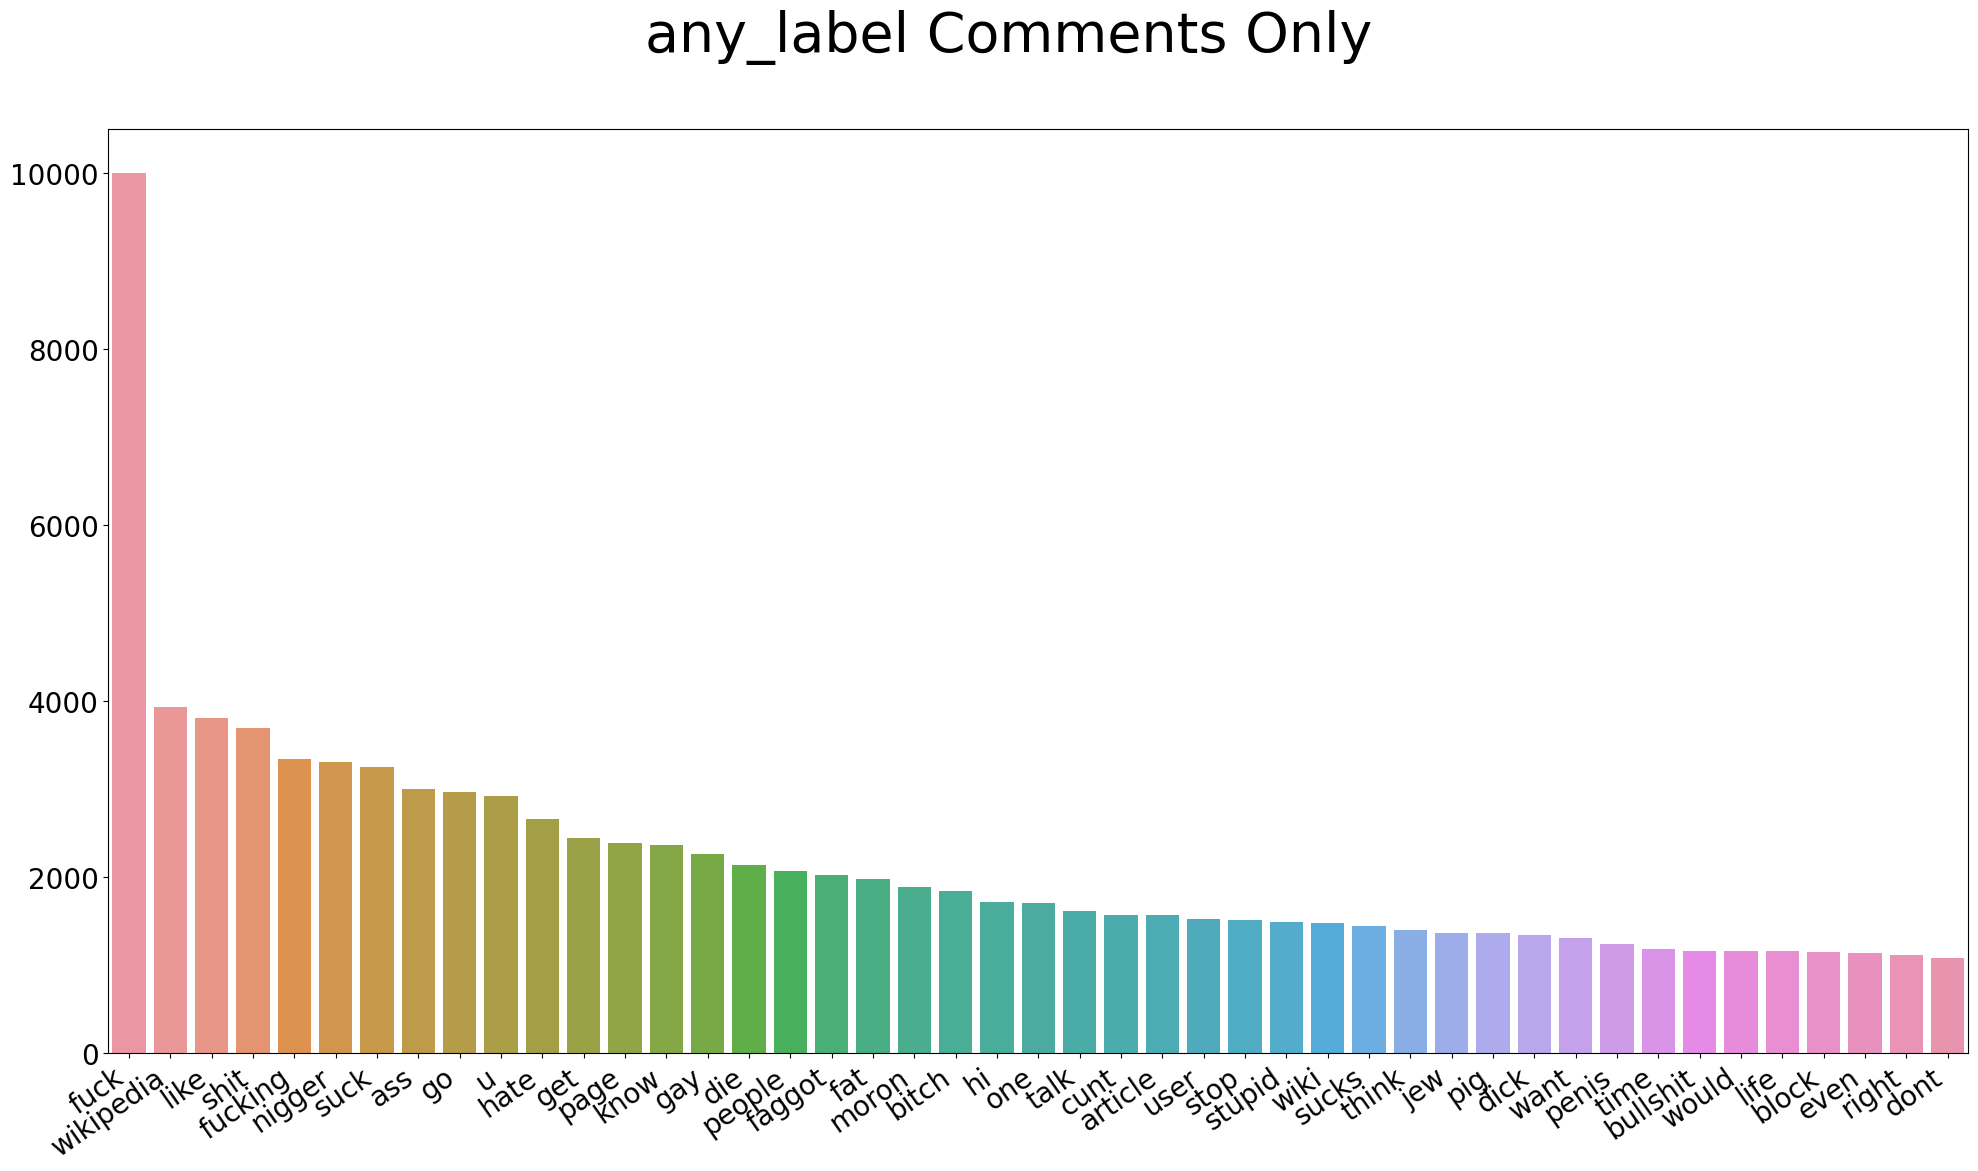

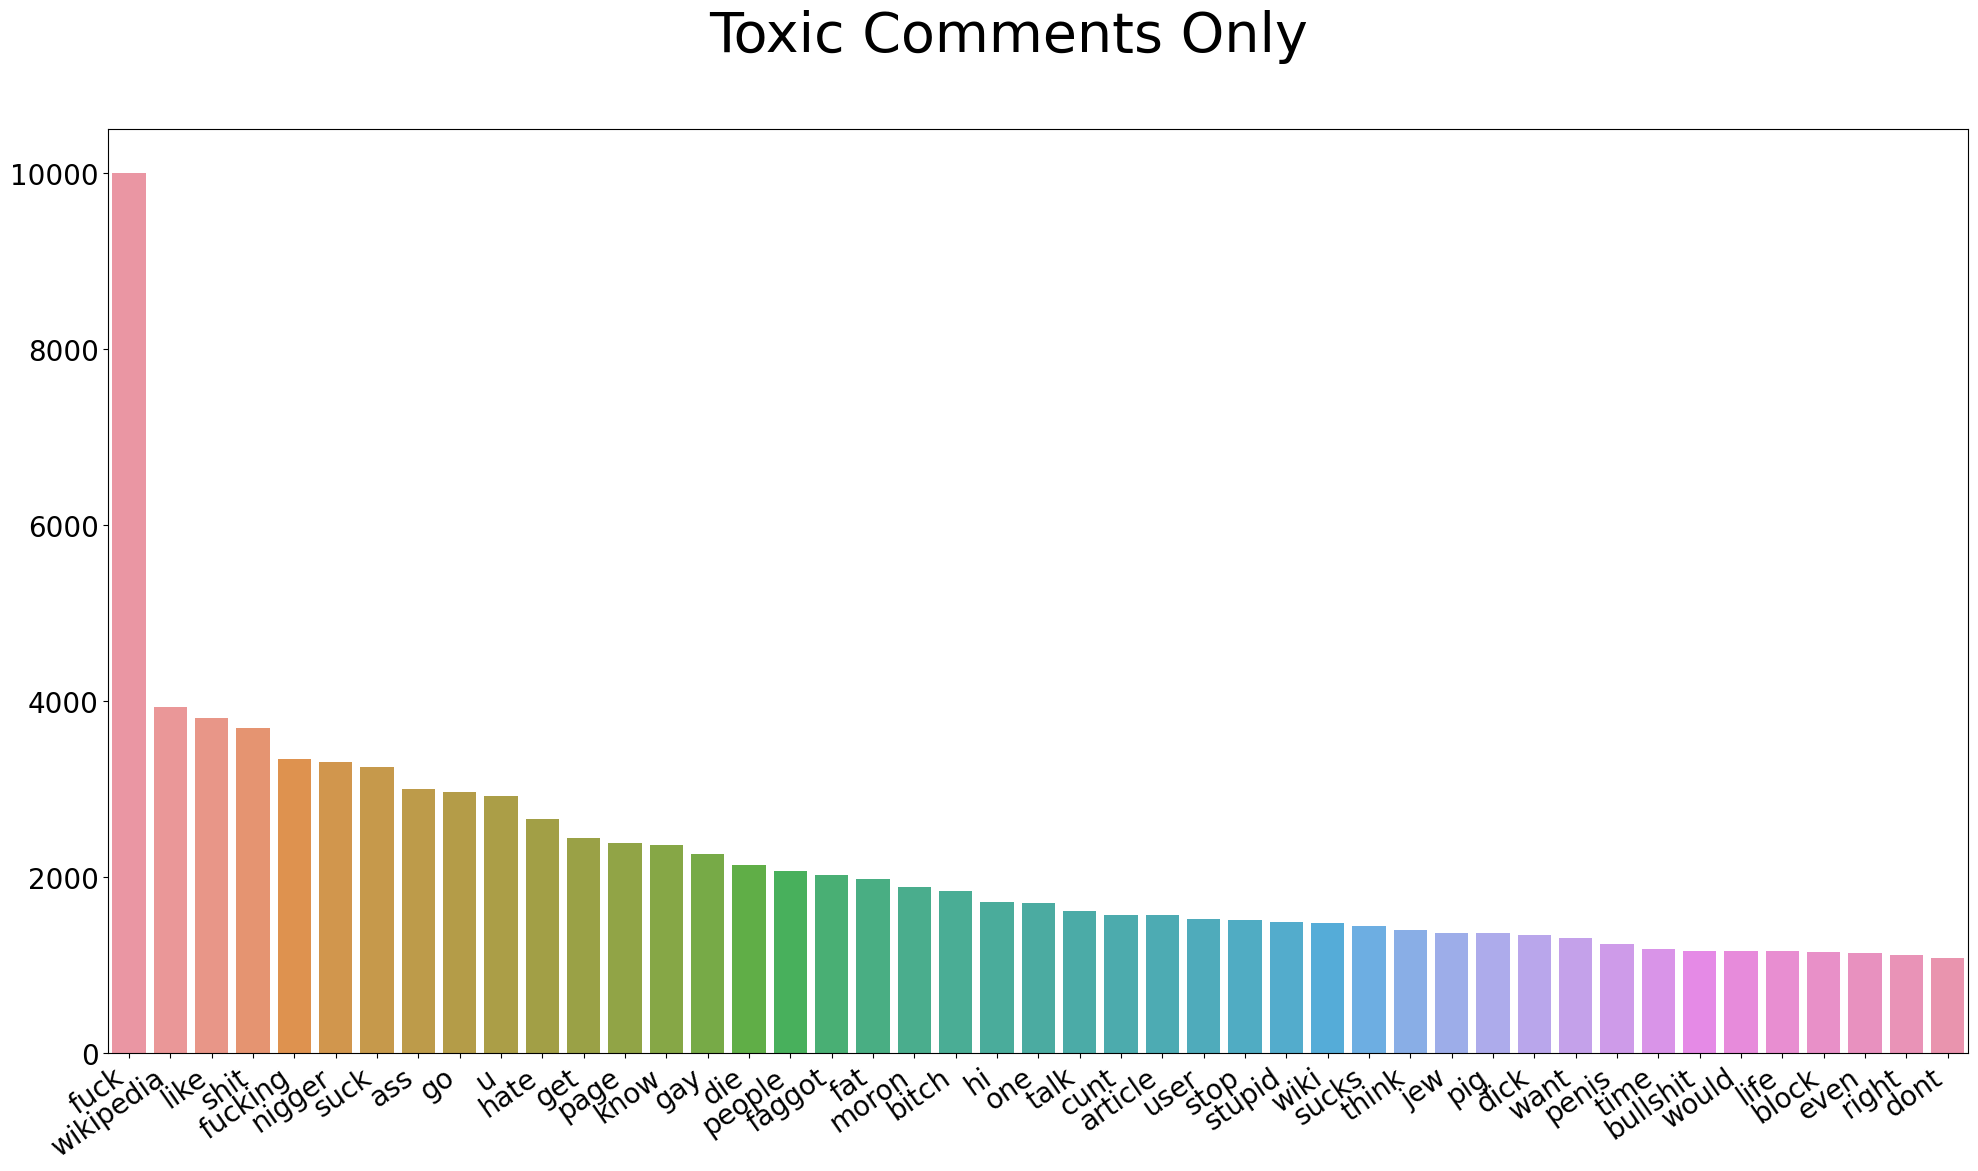

In [ ]:
all_tokenizer = Tokenizer(filters=string.punctuation +'\n' , lower=True)
all_tokenizer.fit_on_texts(df.comment_text[(toxic_rows==0)])
word_plot(get_word_cnt(all_tokenizer) , 45 , 'Clean Comments Only')

for label in targets:
  toxic_tokenizer = Tokenizer(filters=string.punctuation +'\n' , lower=True)
  toxic_tokenizer.fit_on_texts(df.comment_text[(df_targets[label]==1)])
  word_plot(get_word_cnt(toxic_tokenizer) , 45 , label + ' Comments Only')

toxic_tokenizer = Tokenizer(filters=string.punctuation +'\n' , lower=True)
toxic_tokenizer.fit_on_texts(df.comment_text[toxic_rows])
word_plot(get_word_cnt(toxic_tokenizer) , 45 , 'Toxic Comments Only')


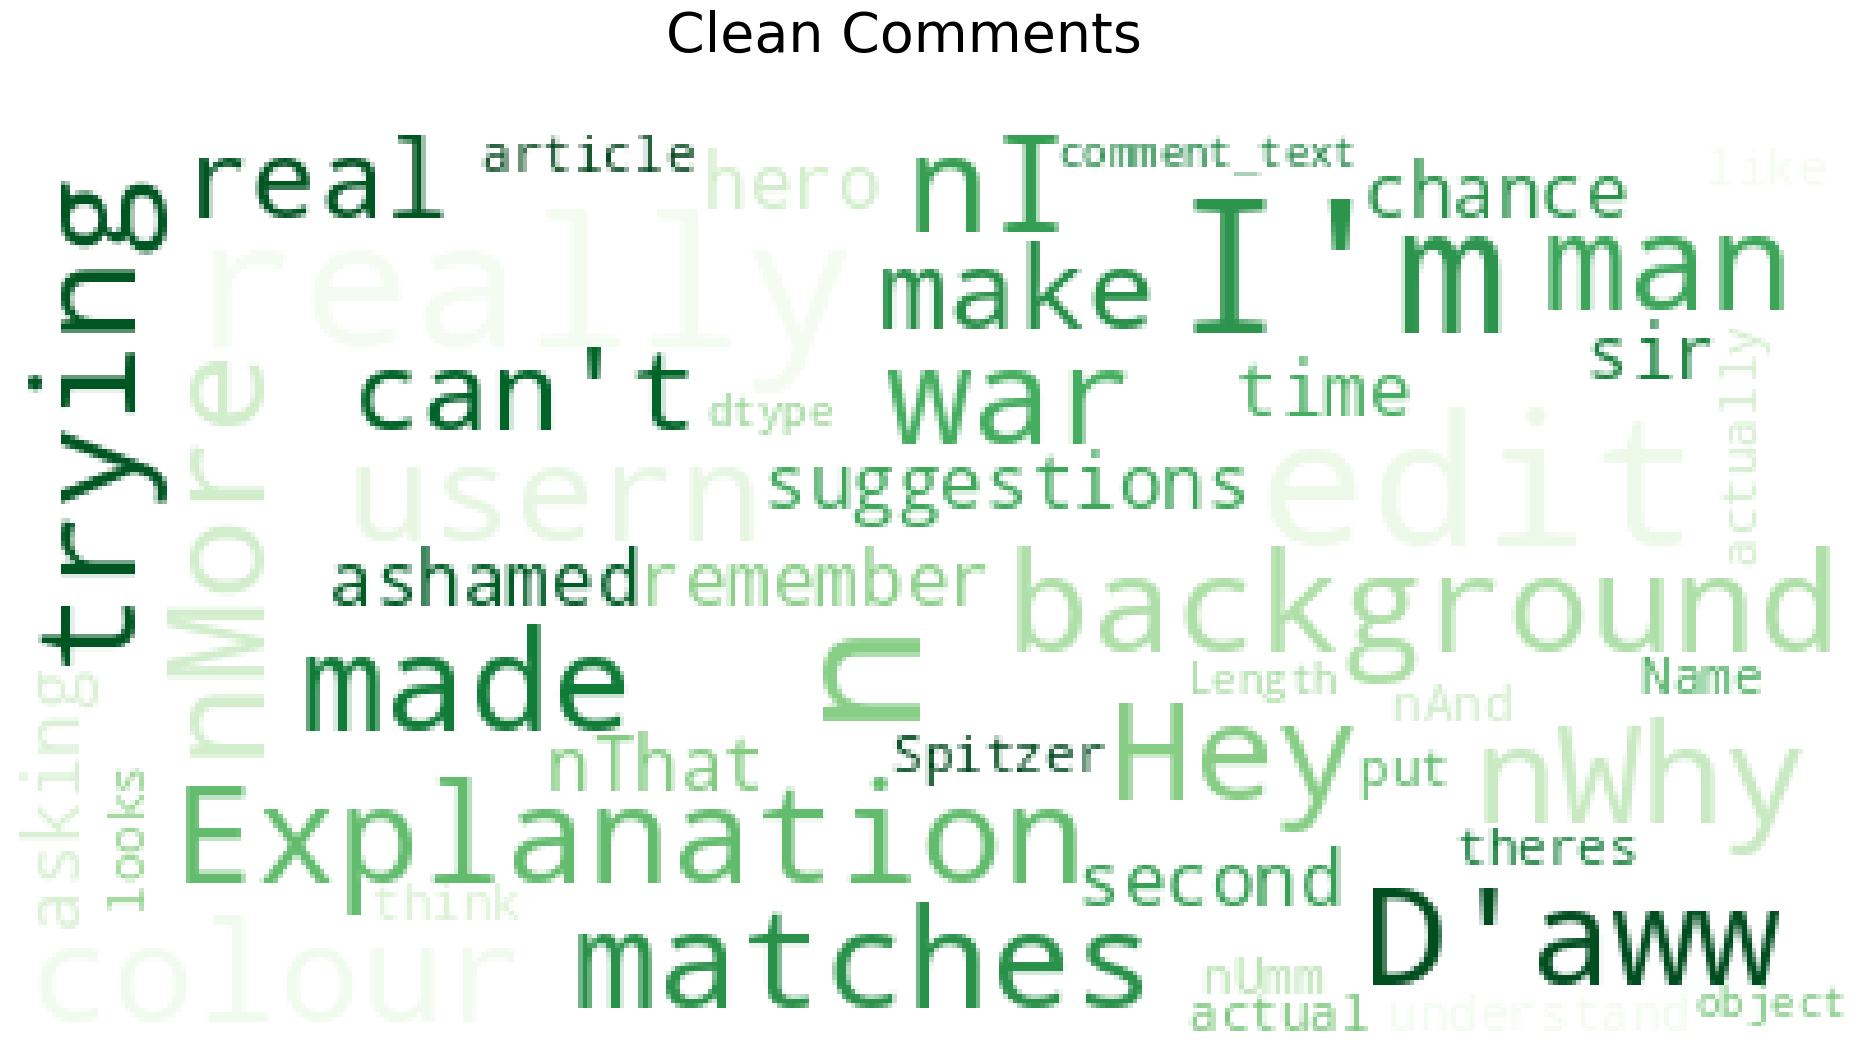

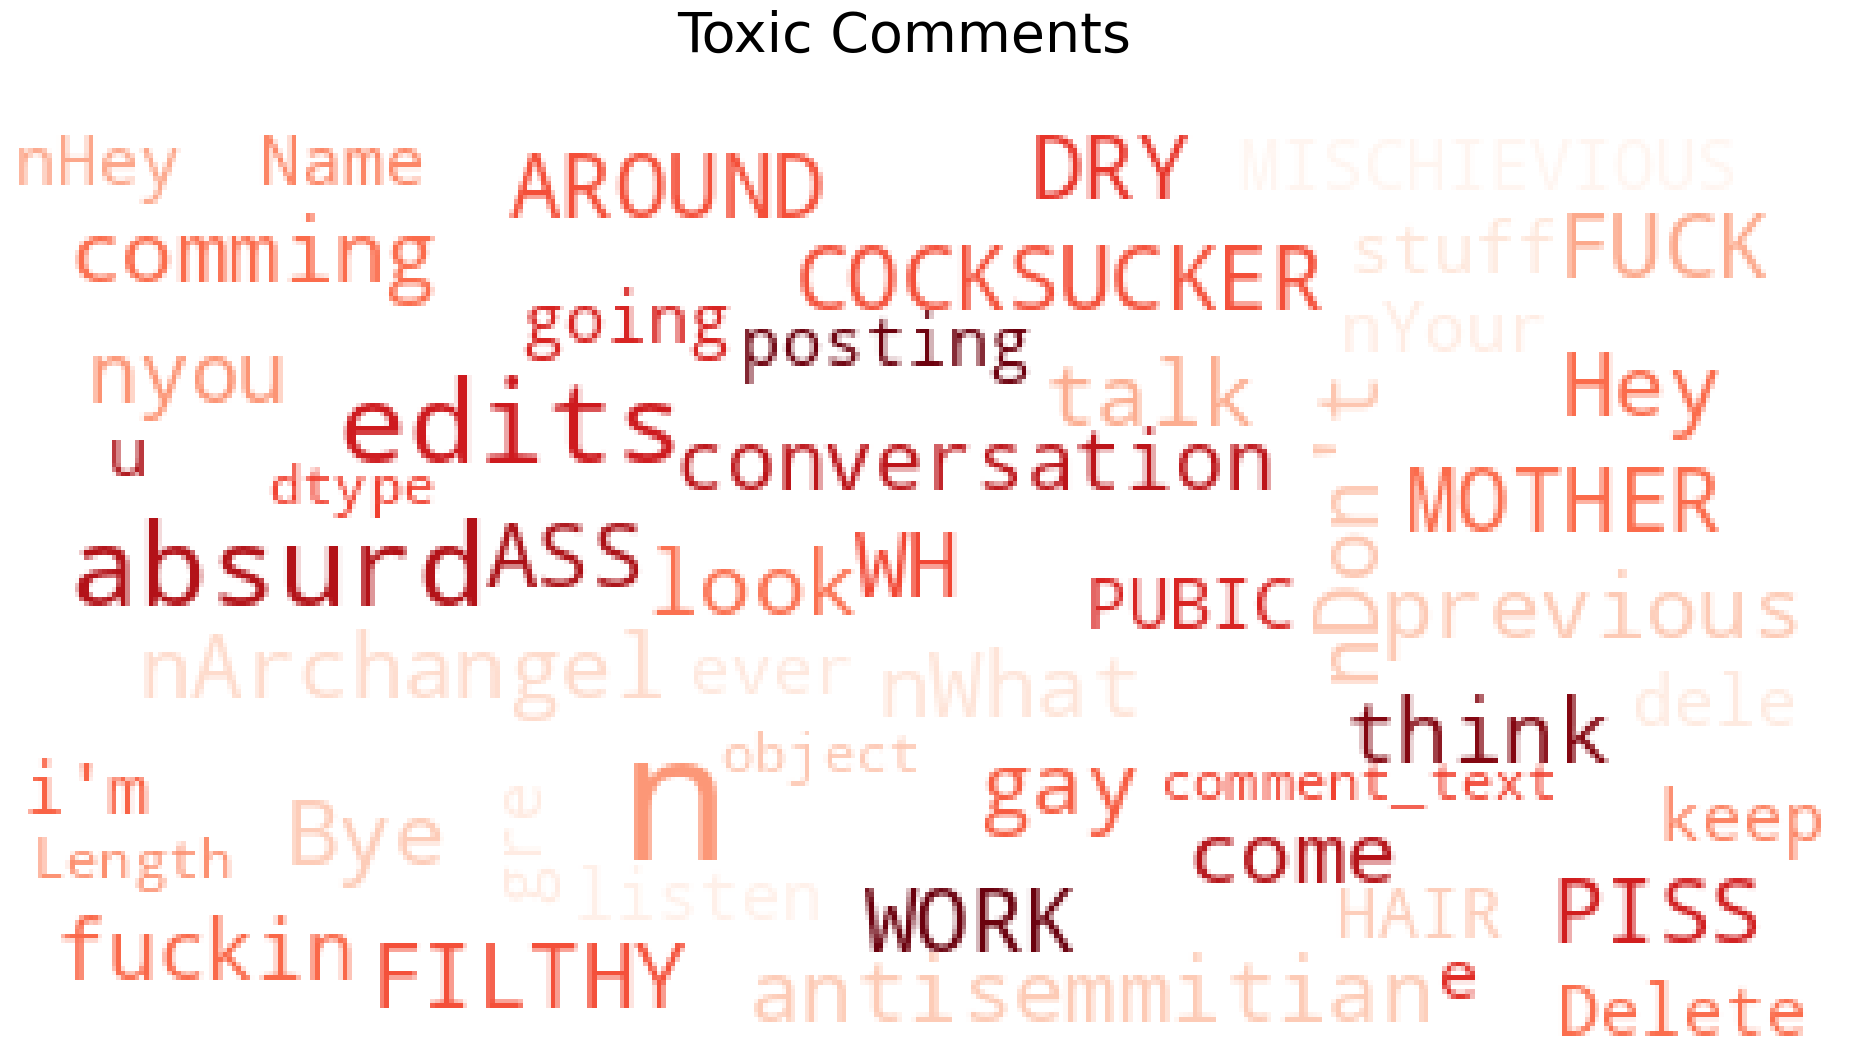

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white' , stopwords=set(stopwords.words('english')) , max_words=100 , 
                      max_font_size=40 , colormap='Greens').generate(str(df.comment_text[(toxic_rows==0)]))

plt.figure("wordcloud" , figsize=(24,12))
plt.suptitle("Clean Comments" , fontsize=40)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


wordcloud = WordCloud(background_color='white' , stopwords=set(stopwords.words('english')) , max_words=100 , 
                      max_font_size=40 , colormap='Reds').generate(str(df.comment_text[toxic_rows]))

plt.figure("toxic_wordcloud" , figsize=(24,12))
plt.suptitle("Toxic Comments" , fontsize=40)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()